In [1]:
import cv2
import pandas
import matplotlib.pyplot as plt
%matplotlib inline

## 作业1：下载tusimple数据集

直接在百度网盘上下载好了

## 作业2：完成相机标定与投射变换

In [2]:
cv2.calibrateCamera?

In [3]:
# 相机标定使用 张正友标定法，参考链接：
# https://blog.csdn.net/qq_40369926/article/details/89251296
# https://blog.csdn.net/weixin_43842653/article/details/89288565?
# utm_medium=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-2.nonecase&depth_1-utm_source=distribute.
# pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-2.nonecase
"""
相机校正
学会用棋盘格进行相机校正（张正友标定法）
熟悉opencv相关函数
cv2.findChessboardCorners
cv2.cornerSubPix
cv2.drawChessboardCorners
cv2.calibrateCamera
cv2.undistort
"""
import numpy as np
import cv2

def calibrate_camera():
    #每个校准图像映射到棋盘角的数量。注意棋盘角是棋盘的内角点，10 * 7个方框，其内角点个数为9 * 6
    # 共20张图片，故objPoints大小为 20 * 9 * 6
    objPoints = {
        1: (9, 6),
        2: (9, 6),
        3: (9, 6),
        4: (9, 6),
        5: (9, 6),
        6: (9, 6),
        7: (9, 6),
        8: (9, 6),
        9: (9, 6),
        10: (9, 6),
        11: (9, 6),
        12: (9, 6),
        13: (9, 6),
        14: (9, 6),
        15: (9, 6),
        16: (9, 6),
        17: (9, 6),
        18: (9, 6),
        19: (9, 6),
        20: (9, 6),
    }
    #目标点空间坐标
    obj3DList = []
    
    #图像中棋盘格中的2D点
    obj2DList = []

    for k in objPoints:
        nx, ny = objPoints[k]
        ######棋盘格对应3D坐标点，x为0-8， y为0-4（对应棋盘格横着9个点，纵着6个点）， z = 0
        obj = np.zeros((nx * ny, 3), np.float32)

        obj[:, :2] = np.mgrid[0: nx, 0: ny].T.reshape(-1, 2)

        fname = 'camera_cal_pic/calibration%s.jpg' % str(k)
        img = cv2.imread(fname)
        #将图像转换为灰度图
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # size = gray.shape[::-1]
        ########查找角点，利用cv2.findChessboardCorners函数，函数返回
        ####ret：是否查找到； corners：角点坐标
        #####################填空1 （一行代码）#####################################
        # cv2.findChessboardCorners参数:灰度图像，内角点个数
        ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
        
        #########################################################################

        if ret == True:
            obj3DList.append(obj)
            #利用cv2.cornerSubPix可以更精细的查找角点坐标，如果查找到了，用这个，没查找到用cv2.findChessboardCorners中找到的角点
            corners2 = cv2.cornerSubPix(gray, corners, (5, 5), (-1, -1), criteria=(cv2.TERM_CRITERIA_MAX_ITER | cv2.TERM_CRITERIA_EPS, 30, 0.001))
            if corners2.any():
                obj2DList.append(corners2)
            else:
                obj2DList.append(corners)
            #可以利用cv2.drawChessboardCorners显示每张图查找到的角点的坐标
            # cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
            # cv2.imshow("img", img)
            # cv2.waitKey(0)
        else:
            print('Warning: ret = %s for %s' % (ret, fname))

    img = cv2.imread('testImage/straight_lines1.jpg')
    img_size = (img.shape[1], img.shape[0])
    #利用图像中2d点和空间3d点计算旋转和平移矩阵，函数使用cv2.calibrateCamera，返回mtx（相机内参矩阵）, dist（畸变矩阵）
    ################填空2（一行代码）################################################
    _, mtx, dist, _, _ = cv2.calibrateCamera(obj3DList, obj2DList, img_size, None, None)
    ##############################################################################
    

    return mtx, dist

mtx, dist = calibrate_camera()
print ("mtx, dist", mtx, dist)
img = cv2.imread('./camera_cal_pic/calibration1.jpg')

##########将img进行校正，利用cv2.undistort这个函数，根据相机内参和外参进行相机校正，校正后的图像为dst

####################填空3（一行代码）#################################################
h, w = img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))#显示更大范围的图片（正常重映射之后会删掉一部分图像）
print (newcameramtx)
dst = cv2.undistort(img,mtx,dist,None,newcameramtx)
x,y,w,h = roi
dst1 = dst[y:y+h,x:x+w]
cv2.imwrite('./camera_cal_pic_undistort/calibration1_undistort.jpg', dst1)
print ("dst的大小为:", dst1.shape)
###################################################################################



mtx, dist [[1.15739390e+03 0.00000000e+00 6.62831413e+02]
 [0.00000000e+00 1.15204489e+03 3.87865116e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]] [[-2.45376248e-01 -4.47616386e-02 -5.13462478e-04  5.26921208e-05
   4.57687912e-02]]
[[985.88085938   0.         670.81327113]
 [  0.         976.02331543 390.02342466]
 [  0.           0.           1.        ]]
dst的大小为: (626, 1207, 3)


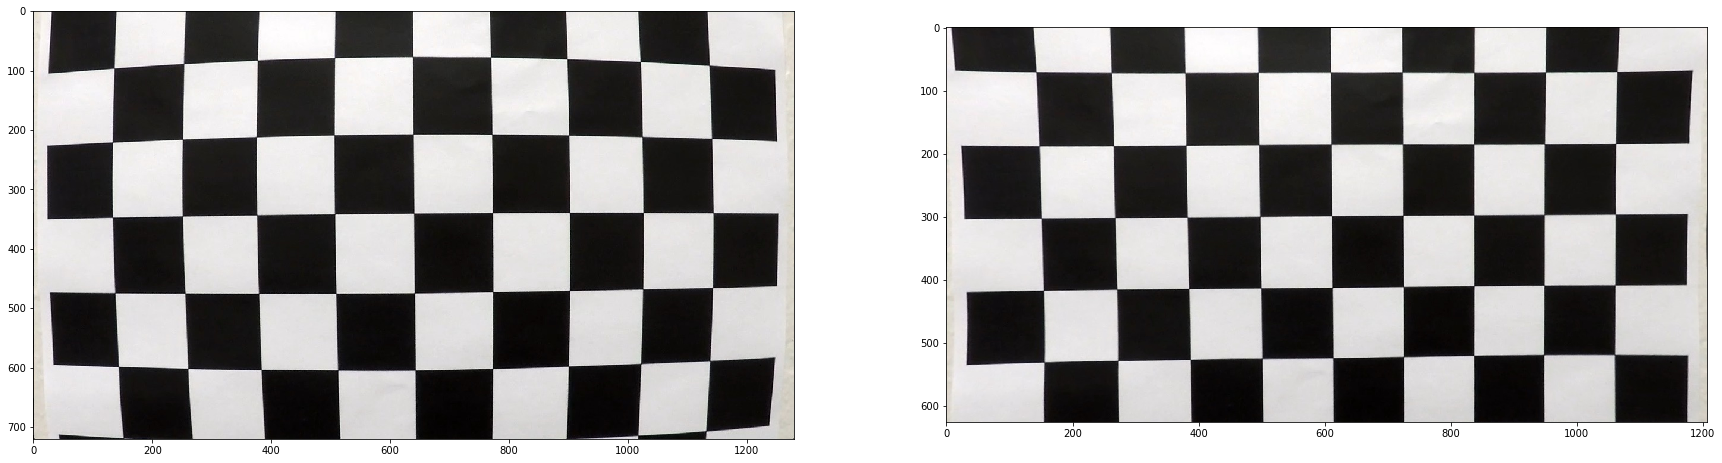

In [4]:
plt.figure(figsize = (30, 30))
plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(122),plt.imshow(cv2.cvtColor(dst1, cv2.COLOR_BGR2RGB))
plt.show()

(-0.5, 1279.5, 719.5, -0.5)

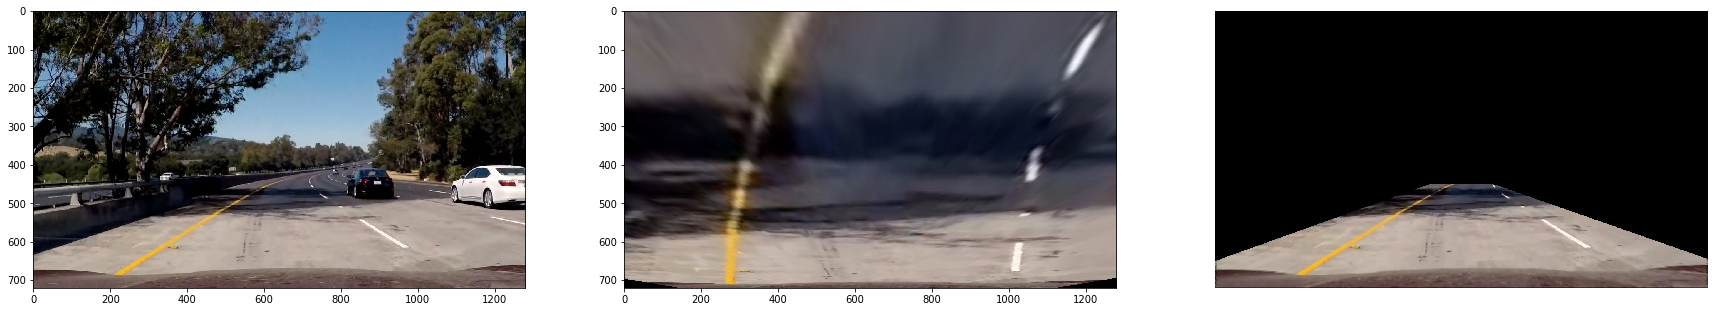

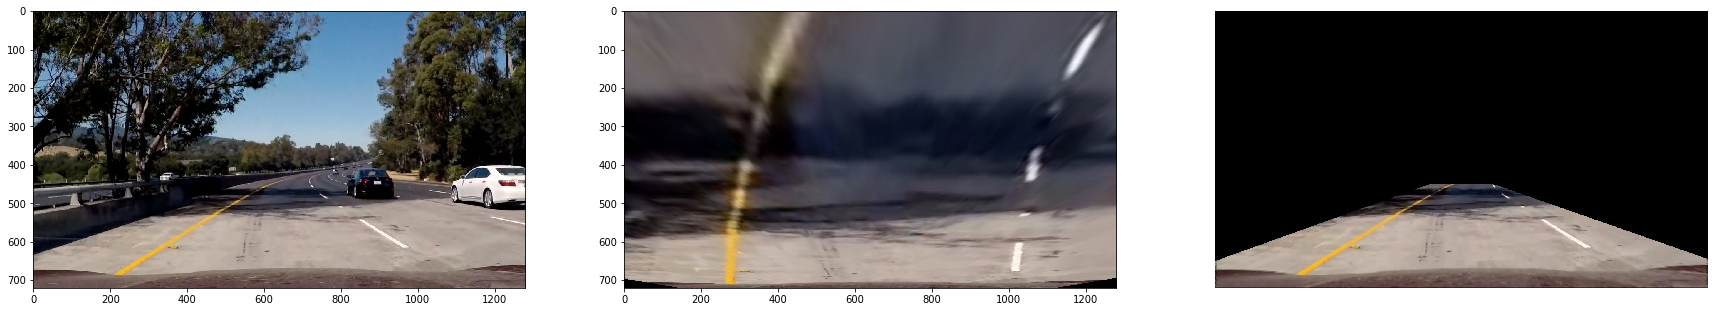

In [6]:
"""
投射变换
熟悉opencv相关函数

"""

import cv2
import numpy as np
import matplotlib.pyplot as plt


def perspective_transform(img):
	
    img_size = (img.shape[1], img.shape[0])

    src = np.float32(
        [[200, 720],
        [1100, 720],
        [595, 450],
        [685, 450]])
    
    dst = np.float32(
        [[300, 720],
        [980, 720],
        [300, 0],
        [980, 0]])

    ###########利用cv2.getPerspectiveTransform从原始src到dst点的矩阵m####################
    ###########利用cv2.getPerspectiveTransform从dst点到原始src的逆矩阵m####################

    ###########根据投射变换矩阵m， 利用cv2.warpPerspective函数将原图img转换成透射变换后的图wraped####################
    ###########根据投射变换逆矩阵m_inv， 将透射变换后的图wraped转换成原始图####################

    ###################################
    ############填空1（4行代码）###########################################################
    m = cv2.getPerspectiveTransform(src, dst)
    m_inv = cv2.getPerspectiveTransform(dst, src)
    warped = cv2.warpPerspective(img, m, img_size)
    unwarped = cv2.warpPerspective(warped, m_inv, img_size)
    
    
    #####################################################################################

    plt.figure(figsize = (30, 30))
    plt.title('calibration')
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.subplot(1, 3, 2)
    plt.imshow(warped)
    plt.subplot(1, 3, 3)
    plt.imshow(unwarped)
    plt.axis('off')
    return warped, unwarped, m, m_inv


img_file = './testImage/test5.jpg'
img = cv2.imread(img_file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#########将img进行投射变换，返回投射变换后的图像，投射变换逆变换后的图像，投射变换矩阵和逆矩阵#######
#############填空2（1行代码）#########################################################

warped, unwarped, m, m_inv = perspective_transform(img)
#####################################################################################



plt.figure(figsize = (30, 30))
plt.title('perspective_transform')
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.imshow(warped)
plt.subplot(1, 3, 3)
plt.imshow(unwarped)
plt.axis('off')

## 作业3:对tusimple里面的数据集做数据增强操作

In [7]:
# 首先修改当前工作目录至tusimple数据集文件夹
import os
os.chdir('G:\\车道线数据集\\tusimple')

FileNotFoundError: [WinError 3] 系统找不到指定的路径。: 'G:\\车道线数据集\\tusimple'

In [7]:
!dir

 驱动器 G 中的卷是 新加卷
 卷的序列号是 BCAE-EDC4

 G:\车道线数据集\tusimple 的目录

2020/08/26  13:56    <DIR>          .
2020/08/26  13:56    <DIR>          ..
2020/08/24  19:16         3,193,449 test_baseline.txt
2020/08/24  19:16         3,625,565 test_label.txt
2020/08/26  14:11    <DIR>          test_set
2020/08/24  20:45    11,468,771,224 test_set.zip
2020/08/26  21:43    <DIR>          train_set
2020/08/24  20:43    11,677,439,288 train_set.zip
               4 个文件 23,153,029,526 字节
               4 个目录 19,608,584,192 可用字节


In [8]:

import cv2
import json
import numpy as np

train_file_path = './train_set'#指定文件所在路径
filetype ='.json'#指定文件类型
def get_filename(path,filetype):
    name =[]
    final_name = []
    for root,dirs,files in os.walk(path):
        for i in files:
            if filetype in i:
                name.append(i.replace(filetype,''))#生成不带‘.json’后缀的文件名组成的列表
    final_name = [item +'.json' for item in name]#生成‘.json’后缀的文件名组成的列表
    return final_name#输出由有‘.json’后缀的文件名组成的列表

file_list = get_filename(train_file_path, filetype)
print(file_list)

[]


In [9]:
# 将工作目录改变为tusimple存放的目录，以此来实现数据倍增操作
os.chdir('G:\\车道线数据集\\tusimple\\train_set')
image_num=0
# 获取图片本身，图片的二值化标注和图片的车道线实例
def get_image_binary_instance(filename, image_num):
    file=open(filename,'r')
    for line in file.readlines():
        data=json.loads(line)
        image=cv2.imread(data['raw_file'])
        binaryimage=np.zeros((image.shape[0],image.shape[1],1),np.uint8)
        instanceimage=binaryimage.copy()
        arr_width=data['lanes']
        arr_height=data['h_samples']
        width_num=len(arr_width)
        height_num=len(arr_height)
        for i in range(height_num):
            lane_hist=30
            for j in range(width_num):
                if arr_width[j][i-1]>0 and arr_width[j][i]>0:
                    binaryimage[int(arr_height[i]),int(arr_width[j][i])]=255
                    instanceimage[int(arr_height[i]),int(arr_width[j][i])]=lane_hist
                    if i>0:
                        cv2.line(binaryimage, (int(arr_width[j][i-1]),int(arr_height[i-1])), (int(arr_width[j][i]),int(arr_height[i])), 255, 10)
                        cv2.line(instanceimage,(int(arr_width[j][i-1]),int(arr_height[i-1])), (int(arr_width[j][i]),int(arr_height[i])), lane_hist, 10)
                lane_hist+=30

        string1="./gt_image_binary/"+str(image_num)+".png"
        string2="./gt_image_instance/"+str(image_num)+".png"
        string3="./image/"+str(image_num)+".png"
        cv2.imwrite(string1,binaryimage)
        cv2.imwrite(string2,instanceimage)
        cv2.imwrite(string3,image)
        image_num=image_num+1
    file.close()
    return image_num

for filename in file_list:
    image_num = get_image_binary_instance(filename, image_num)

FileNotFoundError: [WinError 3] 系统找不到指定的路径。: 'G:\\车道线数据集\\tusimple\\train_set'

In [10]:
!dir

 驱动器 C 中的卷是 Windows
 卷的序列号是 7845-1E83

 C:\Users\15537\Desktop\开课吧\作业\名企作业第二周\名企-week1-徐少杰\week1HomeWork 的目录

2020/08/31  21:52    <DIR>          .
2020/08/31  21:52    <DIR>          ..
2020/07/23  01:48             6,148 .DS_Store
2020/08/31  21:52    <DIR>          .ipynb_checkpoints
2020/08/30  23:12             5,770 camera_calibrate.ipynb
2020/08/31  21:52    <DIR>          camera_cal_pic
2020/08/31  21:52    <DIR>          camera_cal_pic_undistort
2020/08/30  23:12         1,188,962 perspective_transform.ipynb
2020/08/31  21:52    <DIR>          testImage
2020/08/26  18:02         2,750,870 threshold2binaryImage.ipynb
2020/07/23  01:15           254,895 undist6.jpg
2020/08/28  19:38         5,390,497 week1homework.ipynb
               6 个文件      9,597,142 字节
               6 个目录  9,276,416,000 可用字节


此时binary文件夹里面放的是binary二值标注文件，instance文件夹里放的是每条车道线的实例标注（就是不同的车道线用不同的灰度级标注），image里面放的是原图。
我们现在要做数据倍增操作，如果是普通的剪切，旋转，缩放，拉伸等操作，只需将原图与标注做同一的变换即可。如果是用cutout，mixup，mosaic等数据倍增操作，也还是将图片与标注进行同样的操作。毕竟此时标注与图片都是一一对应，大小相同的图片。

In [11]:
# 改变图片的hsv,这个不需要对标注进行操作
def augment_hsv(img, hgain=0.5, sgain=0.5, vgain=0.5):
    r = np.random.uniform(-1, 1, 3) * [hgain, sgain, vgain] + 1  # random gains
    hue, sat, val = cv2.split(cv2.cvtColor(img, cv2.COLOR_RGB2HSV))
    dtype = img.dtype  # uint8

    x = np.arange(0, 256, dtype=np.int16)
    lut_hue = ((x * r[0]) % 180).astype(dtype)
    lut_sat = np.clip(x * r[1], 0, 255).astype(dtype)
    lut_val = np.clip(x * r[2], 0, 255).astype(dtype)

    img_hsv = cv2.merge((cv2.LUT(hue, lut_hue), cv2.LUT(sat, lut_sat), cv2.LUT(val, lut_val))).astype(dtype)
    return cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)

# 一般的旋转，缩放等操作,这些操作需要在原图和标注上同时运行一次
def rotate(image, angle):
    # grab the dimensions of the image and then determine the
    # center
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)
 
    # grab the rotation matrix (applying the negative of the
    # angle to rotate clockwise), then grab the sine and cosine
    # (i.e., the rotation components of the matrix)
    M = cv2.getRotationMatrix2D((cX, cY), -angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
 
    # compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
 
    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY
 
    # perform the actual rotation and return the image
    output=cv2.warpAffine(image, M, (nW, nH))
    return output

# 缩放操作
def resize(img, ratio):
    return cv2.resize(img, None, fx=ratio,fy=ratio,interpolation=cv2.INTER_CUBIC)

# 翻转操作
import math
def flip(img, target):
    return cv2.flip(img, target)

# 一般的旋转，缩放等操作,这些操作需要在原图和标注上同时运行一次
def common_augment(img, label):
    target =  np.random.rand()
    if target < 0.2:
        angle = np.random.randint(0, 361)
        print('angle ' + str(angle))
        img = rotate(img, angle)
        label = rotate(label, angle)
    elif (target >= 0.2) and (target < 0.5):
        ratio = 2 * np.random.rand()
        print('ratio ' + str(ratio))
        img = resize(img, ratio)
        label = resize(label, ratio)
    elif (target >= 0.5) and (target < 0.75):
        temp = math.floor(2 * np.random.rand())
        print('temp ' + str(temp))
        img = flip(img, temp)
        label = flip(label, temp)
    else:
        pass
    return img, label

In [12]:
# 上面是一些常见的随机操作，还有cutout，mixup，mosaic三种数据增强方法，等作业交了再修改吧

In [13]:
# 先取一张图片和它的标签出来
testimg = cv2.cvtColor(cv2.imread('./image/0.png'),cv2.COLOR_BGR2RGB)
testlabel = cv2.imread('./gt_image_binary/0.png')

hsv_img = augment_hsv(testimg)

common_img1, common_label1 = common_augment(testimg, testlabel)
common_img2, common_label2 = common_augment(testimg, testlabel)
common_img3, common_label3 = common_augment(testimg, testlabel)

plt.figure(figsize = (50, 50))
plt.title('augment')
plt.subplot(1, 5, 1)
plt.imshow(testimg)
plt.subplot(1, 5, 2)
plt.imshow(hsv_img)
plt.subplot(1, 5, 3)
plt.imshow(common_img1)
plt.subplot(1, 5, 4)
plt.imshow(common_img2)
plt.subplot(1, 5, 5)
plt.imshow(common_img3)
plt.axis('off')

plt.figure(figsize = (50, 50))
plt.title('augment')
plt.subplot(1, 5, 1)
plt.imshow(testlabel)
plt.subplot(1, 5, 2)
plt.imshow(testlabel)
plt.subplot(1, 5, 3)
plt.imshow(common_label1)
plt.subplot(1, 5, 4)
plt.imshow(common_label2)
plt.subplot(1, 5, 5)
plt.imshow(common_label3)
plt.axis('off')

error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


## 4.用传统方法进行车道线检测

In [14]:
# 再将工作目录改为当前完成作业的目录
os.chdir('E:\\Aftergraduate\\study\\开课吧\\cv名企实训\\课后代码\\week1HomeWork\\week1HomeWork')
!dir

FileNotFoundError: [WinError 3] 系统找不到指定的路径。: 'E:\\Aftergraduate\\study\\开课吧\\cv名企实训\\课后代码\\week1HomeWork\\week1HomeWork'

In [15]:
"""
图像阈值变换

"""

import cv2
import numpy as np
import matplotlib.pyplot as plt

src = np.float32([[200, 720], [1100, 720], [595, 450], [685, 450]])
dst = np.float32([[300, 720], [980, 720], [300, 0], [980, 0]])
m_inv = cv2.getPerspectiveTransform(dst, src)
m = cv2.getPerspectiveTransform(src, dst)


def abs_sobel_threshold(img, orient='x', thresh_min=2, thresh_max=100000):
    
    ###利用X，y方向上sobel，二值化图像######
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        ########参考求x方向的sobel算子，计算y方向上sobel算子#######
        #############填空1 （1行代码）########################
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
        #############填空1 （1行代码）########################
        

    scaled_sobel = np.uint8(255 * abs_sobel / np.max(abs_sobel))
    binary_output = np.zeros_like(scaled_sobel)
    
    #############二值图像，大于最小阈值并且小于最大阈值的区间置为255， 其余为0，可通过修改最大最小值查看差异######
    ##############填空2（1行代码）########################
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 255    
    #############填空2 （1行代码）########################
   
    return binary_output


def mag_threshold(img, sobel_kernel=3, mag_threshold=(20, 1000)):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    ########根据x方向的sobel算子和y方向上sobel算子，计算梯度，公式为sqrt（x^2 + y ^2）#######
    #############填空3 （1行代码）########################
    gradmag = np.sqrt(sobelx ** 2 + sobely ** 2)

    #############填空3 （1行代码）########################
    scale_factor = np.max(gradmag) / 255
    gradmag = (gradmag / scale_factor).astype(np.uint8)
    binary_out = np.zeros_like(gradmag)
    ########转换为二值图，最大最小值可调，kernel_size也可以调整看看差异#######
    #############填空4 （1行代码）########################
    binary_out[(gradmag >= 30) & (gradmag <= 120)] = 255

    #############填空4 （1行代码）########################
    

    return binary_out

def dir_threshold(img, sobel_kernel=5, thresh=(0, np.pi/4)):
	gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
	sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
	sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    ########根据x方向的sobel算子和y方向上sobel算子，计算角度，公式为arctan（y/x），将倾斜角度过大的过滤掉#######
    #############填空5 （1行代码）########################    
	absgraddir = np.arctan2(np.absolute(sobely), np.absolute(sobelx))
    #############填空5 （1行代码）########################
    
	binary_output = np.zeros_like(absgraddir)
    
    ########转换为二值图，最大最小值可调，kernel_size也可以调整看看差异#######
    #############填空6 （1行代码）########################
	binary_output[(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 255
    
    #############填空6 （1行代码）########################
	return binary_output


def hls_thresh(img, thresh=(100, 255)):

	hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    ########分离出s通道s_channel#######
    #############填空7 （1行代码）########################
	s_channel = hls[:, :, 2]
    
    #############填空7 （1行代码）########################
	binary_output = np.zeros_like(s_channel)
    
    ########转换为二值图，最大最小值可调#######
    #############填空8 （1行代码）########################
	binary_output[(s_channel > thresh[0]) & (s_channel <= thresh[1])] = 255
    
    #############填空8 （1行代码）########################
	return binary_output

def combined_threshold(img):
	abs_bin = abs_sobel_threshold(img, orient='x', thresh_min=50, thresh_max=255)
	mag_bin = mag_threshold(img, sobel_kernel=3, mag_threshold=(50, 255))
	dir_bin = dir_threshold(img, sobel_kernel=15, thresh=(0.7, 1.3))
	hls_bin = hls_thresh(img, thresh=(170, 255))

	combined = np.zeros_like(dir_bin)
    #############组合四个阈值结果，判定车道线，##########
    #########例如(abs_bin == 255 | ((mag_bin == 255) & (dir_bin == 255))) | hls_bin == 25）#
    ##########可以尝试不同的组合######################
    #############填空9（1行代码）########################
	combined[(abs_bin == 255 | ((mag_bin == 255) & (dir_bin == 255))) | hls_bin == 255] = 255
    
    #############填空9 （1行代码）########################

	return combined, abs_bin, mag_bin, dir_bin, hls_bin

def line_fit_and_draw_line(binary_warped):
    # "查找拟合直线"
    # 对图像对下半部分查找直方图
    #############填空10（1行代码）截取图像高度的下方1/2处########################
    
    histogram = np.sum(binary_warped[binary_warped.shape[0] // 2:, :], axis=0)
    
    #############填空10（1行代码）截取图像高度的下方1/2处########################
    out_img = (np.dstack((binary_warped, binary_warped, binary_warped)) * 255).astype('uint8')

    #查找直方图中左右两侧对峰值
    midpoint = np.int(histogram.shape[0] / 2)
    
    #左侧从100到 midpoint的最大值，转换成图像坐标还要加上100哦～############
    #右侧从midpoint到图像宽度减100的最大值，转换成图像坐标还要加上midpoint哦～############
    ####也就是图像左右边缘100像素内不查找车道线##################
    
    #############填空11（2行代码）查找左侧右侧最大值基本点########################
    leftx_base = np.argmax(histogram[100: midpoint]) + 100
    rightx_base = np.argmax(histogram[midpoint: -100]) + midpoint
    #############填空11（2行代码）查找左侧右侧最大值基本点########################

    ##########以下是关于滑动窗口查找车道线的代码#####################
    nwindows = 9
    window_height = np.int(binary_warped.shape[0] / nwindows)
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])

    leftx_current = leftx_base
    rightx_current = rightx_base

    margin = 100
    minpix = 10

    left_lane_inds = []
    right_lane_inds = []

    for window in range(nwindows):
        win_y_low = binary_warped.shape[0] - (window + 1) * window_height
        win_y_high = binary_warped.shape[0] - window * window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin

        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox > win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]

        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)

        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds]
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    ##########以上是关于滑动窗口查找车道线的代码#####################
    
    
    #将左侧，右侧车道线3次拟合，用函数np.polyfit##########
    #############填空12（2行代码）左侧、右侧车道线拟合#######################
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    #############填空12（2行代码）左侧、右侧车道线拟合#######################
    
    ################在图上画出拟合的线########################
    ploty = np.linspace(0, undist.shape[0]-1, undist.shape[0])
    
    #########对y进行拟合，x = a * y ^ 2 + b * y + C
    #############填空13（2行代码）左侧、右侧车道线方程坐标#######################
    left_fitx = left_fit[0] * ploty ** 2 + left_fit[1] * ploty + left_fit[2]
    right_fitx = right_fit[0] * ploty ** 2 + right_fit[1] * ploty + right_fit[2]
    #############填空13（2行代码）左侧、右侧车道线方程坐标#######################
    
    ######生成一张黑图，做mask，将车道线区域标注出来##########
    color_warp = np.zeros((720, 1280, 3), dtype='uint8')
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))
    # 在透射变换后的图上画出车道线
    cv2.fillPoly(color_warp, np.int_([pts]), (0, 255, 0))
    

    # 将画出的车道线的图，逆变换到原来的图上，将color_warp逆变换为newwarp
    #############填空14（1行代码）#######################
    newwarp = cv2.warpPerspective(color_warp, m_inv, (undist.shape[1], undist.shape[0]))
    #############填空14（1行代码）#######################
    
    
    # 将原来的图和标注好车道线的图叠加，用cv2.addWeighted，可画成半透明，最终图为result
    #############填空15（1行代码）#######################
    result = cv2.addWeighted(undist, 1, newwarp, 0.4, 0)
    #############填空15（1行代码）#######################
    
    plt.figure(figsize = (30, 30))
    plt.title('lane')
    plt.subplot(1, 1, 1)
    plt.imshow(result)
    plt.axis('off')

C:\Users\15537\Anaconda3\lib\site-packages\ipykernel_launcher.py:220: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


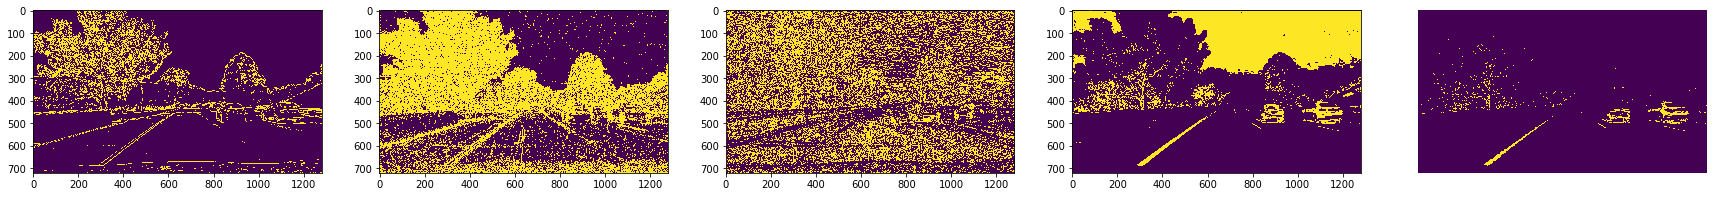

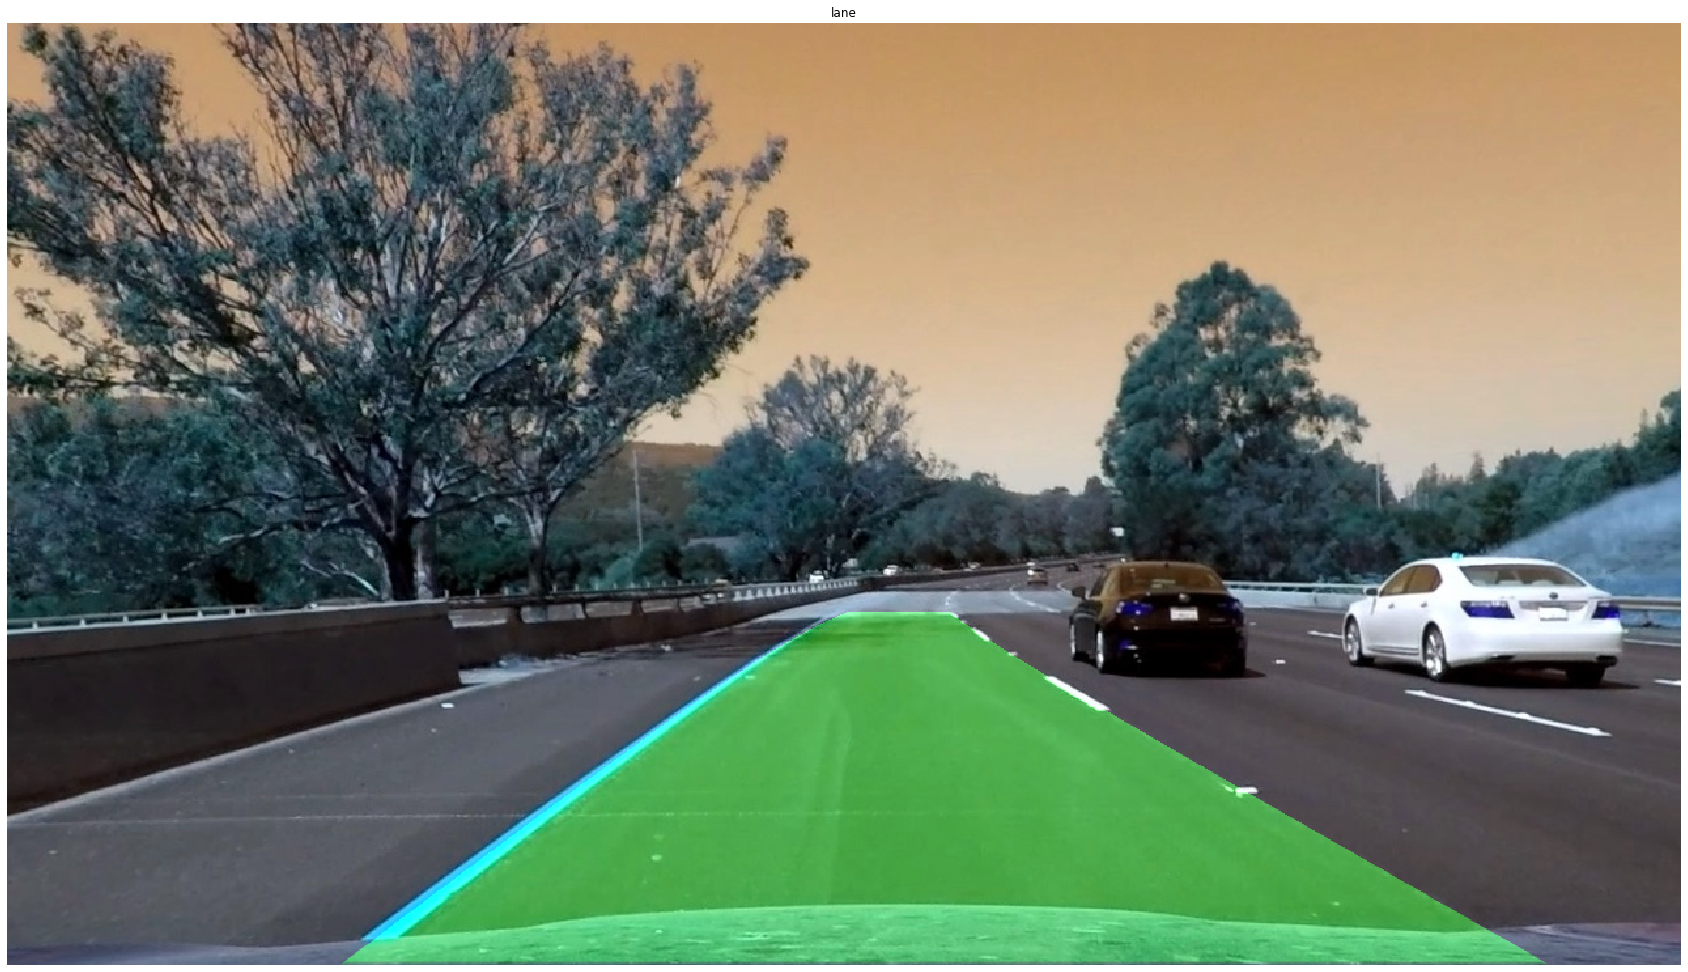

In [16]:

img = cv2.imread("./testImage/test6.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
out1 = mag_threshold(img)
out2 = abs_sobel_threshold(img)
out3 = dir_threshold(img)
out4 = hls_thresh(img)
imgOut, abs_bin, mab_bin, dir_bin, hls_bin = combined_threshold(img)
plt.figure(figsize = (30, 30))
plt.title('calibration')
plt.subplot(1, 5, 1)
plt.imshow(out1)
plt.subplot(1, 5, 2)
plt.imshow(out2)
plt.subplot(1, 5, 3)
plt.imshow(out3)
plt.subplot(1, 5, 4)
plt.imshow(out4)
plt.subplot(1, 5, 5)
plt.imshow(imgOut)
plt.axis('off')
imgOut_size = (imgOut.shape[1], imgOut.shape[0])
binary_warped = cv2.warpPerspective(imgOut, m, imgOut_size, flags=cv2.INTER_LINEAR)
undist = cv2.imread('undist6.jpg')
line_fit_and_draw_line(binary_warped)